<a href="https://colab.research.google.com/github/Penn2001/APM_Figures/blob/master/SQL_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from io import StringIO
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date as dt
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x) #set precison of floating point

In [3]:
#Reading from a CSV file, we can use the parse_dates option to read dates into datetime datatypes for date manipulations.
#This eliminates the need for explicite data voncersions.  Otherwise, dates are read in from a CSV as an object, and
#datetime methods do not operate on objects.  Datetime methods need datetime data types.

#I added and ID Columns to the csv file to idetify a key value

dfdw = pd.read_csv('/content/drive/MyDrive/MSSP607/InternetSales.csv', parse_dates=['BirthDate','DateFirstPurchase','OrderDate','DueDate','ShipDate'],
                   low_memory=False, index_col='ID')
dfdw['BirthDate'] #Notice the dates are read into the data frame as datetime, not objects.

ID
0       1971-10-06
1       1971-10-06
2       1971-10-06
3       1971-10-06
4       1971-10-06
           ...    
60393   1977-05-06
60394   1977-05-06
60395   1965-07-04
60396   1964-09-01
60397   1965-06-06
Name: BirthDate, Length: 60398, dtype: datetime64[ns]

In [4]:
dfdw.shape #determine the dimensionality of the dataframe: 60,398 rows, and 59 columns

(60398, 59)

In [5]:
dfdw.shape[0] #returns the number of rows

60398

In [6]:
dfdw.shape[1] #returns the number of columns

59

In [7]:
dfdw.columns

Index(['CustomerKey', 'GeographyKey', 'City', 'CountryRegionCode',
       'EnglishCountryRegionName', 'CustomerAlternateKey', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'SpanishEducation', 'FrenchEducation', 'EnglishOccupation',
       'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone',
       'DateFirstPurchase', 'CommuteDistance', 'ProductKey',
       'EnglishProductName', 'OrderDateKey', 'DueDateKey', 'ShipDateKey',
       'CustomerKey.1', 'PromotionKey', 'CurrencyKey', 'SalesTerritoryKey',
       'SalesOrderNumber', 'SalesOrderLineNumber', 'RevisionNumber',
       'OrderQuantity', 'UnitPrice', 'ExtendedAmount', 'UnitPriceDiscountPct',
       'DiscountAmount', 'ProductStandardCost', 'TotalProductCost',
       'SalesAmount', 

In [8]:
dfdw.to_csv('/content/drive/MyDrive/MSSP607/dfdw.csv') #prints the dataframe to a CSV file

In [9]:
#Let's find what series has Null values.
dfdw.isnull().sum()

CustomerKey                     0
GeographyKey                    0
City                            0
CountryRegionCode               0
EnglishCountryRegionName        0
CustomerAlternateKey            0
Title                       60091
FirstName                       0
MiddleName                  25495
LastName                        0
NameStyle                       0
BirthDate                       0
MaritalStatus                   0
Suffix                      60392
Gender                          0
EmailAddress                    0
YearlyIncome                    0
TotalChildren                   0
NumberChildrenAtHome            0
EnglishEducation                0
SpanishEducation                0
FrenchEducation                 0
EnglishOccupation               0
SpanishOccupation               0
FrenchOccupation                0
HouseOwnerFlag                  0
NumberCarsOwned                 0
AddressLine1                    0
AddressLine2                59293
Phone         

In [10]:
dfdw

,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
ID,,,,,,,,,,,,,,,,,,,,,
0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,1912.15,1912.15,3399.99,272.00,85.00,NaN,NaN,2011-01-19,2011-01-31,2011-01-26
1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,1265.62,1265.62,2319.99,185.60,58.00,NaN,NaN,2013-01-18,2013-01-30,2013-01-25
2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,8.22,8.22,21.98,1.76,0.55,NaN,NaN,2013-01-18,2013-01-30,2013-01-25
3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,1481.94,1481.94,2384.07,190.73,59.60,NaN,NaN,2013-05-03,2013-05-15,2013-05-10
4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,...,10.84,10.84,28.99,2.32,0.72,NaN,NaN,2013-05-03,2013-05-15,2013-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,29480,248,London,GB,United Kingdom,AW00029480,NaN,Nina,W,Raji,...,13.09,13.09,34.99,2.80,0.87,NaN,NaN,2013-07-17,2013-07-29,2013-07-24
60394,29480,248,London,GB,United Kingdom,AW00029480,NaN,Nina,W,Raji,...,6.92,6.92,8.99,0.72,0.22,NaN,NaN,2013-07-17,2013-07-29,2013-07-24
60395,29481,120,Hof,DE,Germany,AW00029481,NaN,Ivan,NaN,Suri,...,1898.09,1898.09,3374.99,270.00,84.37,NaN,NaN,2011-08-13,2011-08-25,2011-08-20


In [11]:
#Make a new dataframe and keep the original.  Just for fun
dfsales=dfdw

In [12]:
dfsales.isnull().sum() #determine the mumber of NULL values in each series

CustomerKey                     0
GeographyKey                    0
City                            0
CountryRegionCode               0
EnglishCountryRegionName        0
CustomerAlternateKey            0
Title                       60091
FirstName                       0
MiddleName                  25495
LastName                        0
NameStyle                       0
BirthDate                       0
MaritalStatus                   0
Suffix                      60392
Gender                          0
EmailAddress                    0
YearlyIncome                    0
TotalChildren                   0
NumberChildrenAtHome            0
EnglishEducation                0
SpanishEducation                0
FrenchEducation                 0
EnglishOccupation               0
SpanishOccupation               0
FrenchOccupation                0
HouseOwnerFlag                  0
NumberCarsOwned                 0
AddressLine1                    0
AddressLine2                59293
Phone         

In [13]:
dfsales.dropna(axis=0) #drop rows axis=1, drop columns axis = 0, entire table at once axis = None

,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
ID,,,,,,,,,,,,,,,,,,,,,


In [14]:
dfsales = dfsales.dropna(axis=1) #drop rows axis=1, drop columns axis = 0, entire table at once axis = None

In [15]:
dfsales.info() #Notice the dateteme datatype for the date values read from the csv

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60398 entries, 0 to 60397
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerKey               60398 non-null  int64         
 1   GeographyKey              60398 non-null  int64         
 2   City                      60398 non-null  object        
 3   CountryRegionCode         60398 non-null  object        
 4   EnglishCountryRegionName  60398 non-null  object        
 5   CustomerAlternateKey      60398 non-null  object        
 6   FirstName                 60398 non-null  object        
 7   LastName                  60398 non-null  object        
 8   NameStyle                 60398 non-null  bool          
 9   BirthDate                 60398 non-null  datetime64[ns]
 10  MaritalStatus             60398 non-null  object        
 11  Gender                    60398 non-null  object        
 12  EmailAddress      

In [16]:
#Generate some preliminary exploratory data analysis…
dfsales.describe()

,CustomerKey,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,ProductKey,OrderDateKey,DueDateKey,...,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight
count,60398.00,60398.00,60398.00,60398.00,60398.00,60398.00,60398.00,60398.00,60398.00,60398.00,...,60398.00,60398.00,60398.00,60398.00,60398.00,60398.00,60398.00,60398.00,60398.00,60398.00
mean,18841.69,230.52,59715.06,1.85,1.08,0.69,1.51,437.56,20129734.93,20130104.17,...,1.00,486.09,486.09,0.00,0.00,286.07,286.07,486.09,38.89,12.15
std,5432.43,192.40,33065.43,1.62,1.59,0.46,1.15,118.09,4745.05,4985.45,...,0.00,928.49,928.49,0.00,0.00,552.46,552.46,928.49,74.28,23.21
min,11000.00,2.00,10000.00,0.00,0.00,0.00,0.00,214.00,20101229.00,20110110.00,...,1.00,2.29,2.29,0.00,0.00,0.86,0.86,2.29,0.18,0.06
25%,14003.00,51.00,30000.00,0.00,0.00,0.00,1.00,359.00,20130403.00,20130415.00,...,1.00,7.95,7.95,0.00,0.00,2.97,2.97,7.95,0.64,0.20
50%,18143.00,211.00,60000.00,2.00,0.00,1.00,2.00,479.00,20130714.00,20130726.00,...,1.00,29.99,29.99,0.00,0.00,11.22,11.22,29.99,2.40,0.75
75%,23429.75,329.00,80000.00,3.00,2.00,1.00,2.00,529.00,20131018.00,20131030.00,...,1.00,539.99,539.99,0.00,0.00,294.58,294.58,539.99,43.20,13.50
max,29483.00,654.00,170000.00,5.00,5.00,1.00,4.00,606.00,20140128.00,20140209.00,...,1.00,3578.27,3578.27,0.00,0.00,2171.29,2171.29,3578.27,286.26,89.46


##Internet Sales Profit

What is the profit generated through the internet?

In [17]:
#First, notice the series needed to determine profit.
#Notice, there are no discounts, and we have the standard product costs and the total product costs so we can determine profit.
#Also, the ExtendedAmount is simply the quantity ordered X the UnitPrice.
dfsales[['EnglishProductName','OrderQuantity','UnitPrice','ExtendedAmount','UnitPriceDiscountPct','DiscountAmount','ProductStandardCost','TotalProductCost']]


,EnglishProductName,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost
ID,,,,,,,,
0,"Mountain-100 Silver, 38",1,3399.99,3399.99,0,0,1912.15,1912.15
1,"Mountain-200 Silver, 38",1,2319.99,2319.99,0,0,1265.62,1265.62
2,Fender Set - Mountain,1,21.98,21.98,0,0,8.22,8.22
3,"Touring-1000 Blue, 46",1,2384.07,2384.07,0,0,1481.94,1481.94
4,Touring Tire,1,28.99,28.99,0,0,10.84,10.84
...,...,...,...,...,...,...,...,...
60393,"Sport-100 Helmet, Black",1,34.99,34.99,0,0,13.09,13.09
60394,AWC Logo Cap,1,8.99,8.99,0,0,6.92,6.92
60395,"Mountain-100 Black, 42",1,3374.99,3374.99,0,0,1898.09,1898.09


In [18]:
#Let’s find the Proft for each product ordered and aggregate by Region.
results = (dfsales.assign(Profit = lambda x: x['SalesAmount'] - dfsales['TotalProductCost'])
    .groupby("CountryRegionCode")
    .agg(
        {'OrderQuantity': 'sum',
         'UnitPrice': 'mean',
         'SalesAmount': 'sum',
         'TotalProductCost': 'sum',
         'Profit': 'sum'
         }
    )).reset_index()

results

,CountryRegionCode,OrderQuantity,UnitPrice,SalesAmount,TotalProductCost,Profit
0,AU,13345,678.98,9061000.58,5375145.51,3685855.08
1,CA,7620,259.56,1977844.86,1147923.36,829921.50
2,DE,5625,514.54,2894312.34,1706941.57,1187370.76
3,FR,5558,475.71,2644017.71,1557752.99,1086264.72
4,GB,6906,491.13,3391712.21,2001221.43,1390490.78
5,US,21344,439.93,9389789.51,5488808.71,3900980.80


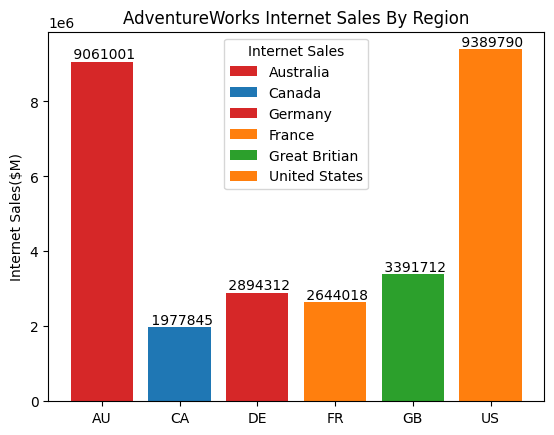

In [63]:
# Plotting sales and profit on a single axis with data labels
width = 0.6
fig, ax = plt.subplots()
bottom = np.zeros(3)
bar_labels = ['Australia', 'Canada', 'Germany', 'France', 'Great Britian', 'United States']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green','tab:orange']

ax.bar(results['CountryRegionCode'], results['SalesAmount'], label=bar_labels, color=bar_colors)
ax.set_ylabel('Internet Sales($M)')
ax.set_title('AdventureWorks Internet Sales By Region')
ax.legend(title='Internet Sales')
ax.set_yscale('linear')
for index, value in enumerate(results['SalesAmount']):
    plt.text(index, value, f'{value: .0f}', ha='center', va='bottom')

In [80]:
plt.close('all')

In [114]:
regions = tuple(results['CountryRegionCode'])
regions

('AU', 'CA', 'DE', 'FR', 'GB', 'US')

In [134]:
data = results.to_dict(orient='records')
data


[{'CountryRegionCode': 'AU',
  'OrderQuantity': 13345,
  'UnitPrice': 678.9809355114276,
  'SalesAmount': 9061000.5844,
  'TotalProductCost': 5375145.5081,
  'Profit': 3685855.0763000003},
 {'CountryRegionCode': 'CA',
  'OrderQuantity': 7620,
  'UnitPrice': 259.5596931889764,
  'SalesAmount': 1977844.8621,
  'TotalProductCost': 1147923.3609,
  'Profit': 829921.5012},
 {'CountryRegionCode': 'DE',
  'OrderQuantity': 5625,
  'UnitPrice': 514.54441568,
  'SalesAmount': 2894312.3382,
  'TotalProductCost': 1706941.5732,
  'Profit': 1187370.765},
 {'CountryRegionCode': 'FR',
  'OrderQuantity': 5558,
  'UnitPrice': 475.71387446923353,
  'SalesAmount': 2644017.7143,
  'TotalProductCost': 1557752.9925,
  'Profit': 1086264.7218},
 {'CountryRegionCode': 'GB',
  'OrderQuantity': 6906,
  'UnitPrice': 491.1254287431219,
  'SalesAmount': 3391712.2109,
  'TotalProductCost': 2001221.4329,
  'Profit': 1390490.778},
 {'CountryRegionCode': 'US',
  'OrderQuantity': 21344,
  'UnitPrice': 439.92642010869565,


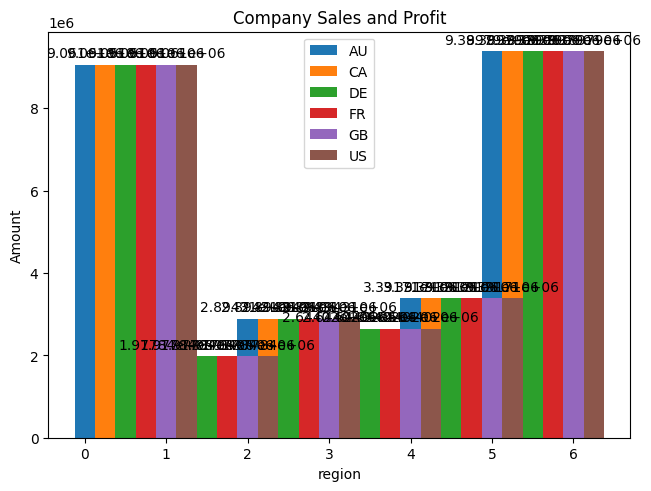

In [96]:
regions = tuple(results['CountryRegionCode'])
x = np.arange(len(regions))
width = 0.25 #Set the width of the bars to the length of 'ContryRegionCode'
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for country, in regions():
    offset = width * multiplier
    rects = ax.bar(x + offset, results['SalesAmount'], width, label=country)
    ax.bar_label(rects, padding=3)
    multiplier += 1


# Adding title and labels
ax.set_title('Company Sales and Profit')
ax.set_xlabel('Region')
ax.set_ylabel('Amount')

# Adding legend
ax.legend()

# Displaying the plot
plt.show()


In [20]:
#Using the agg() method returns a dataframe
dfsales.groupby('CountryRegionCode')['SalesAmount'].agg(['min','max','mean','sum'])

,min,max,mean,sum
CountryRegionCode,,,,
AU,2.29,3578.27,678.98,9061000.58
CA,2.29,3578.27,259.56,1977844.86
DE,2.29,3578.27,514.54,2894312.34
FR,2.29,3578.27,475.71,2644017.71
GB,2.29,3578.27,491.13,3391712.21
US,2.29,3578.27,439.93,9389789.51


In [21]:
#Using the sum method at the end of the dataframe returns a set of series not a dataframe.
#This is important if you are to use the results in other method like determining the year.
#Some methods require a dataframe, not a function.
regionsales = dfsales.groupby(["GeographyKey","City","CountryRegionCode"]).SalesAmount.sum
regionsales()

GeographyKey  City           CountryRegionCode
2             Coffs Harbour  AU                  235454.97
3             Darlinghurst   AU                  155010.38
4             Goulburn       AU                  310875.90
5             Lane Cove      AU                  220083.58
6             Lavender Bay   AU                  195122.90
                                                    ...   
642           Tacoma         US                  101862.27
644           Walla Walla    US                  138734.28
648           Yakima         US                   94460.07
653           Casper         US                    1214.46
654           Cheyenne       US                    5900.55
Name: SalesAmount, Length: 336, dtype: float64

In [22]:
countrysales = dfsales.groupby(["CountryRegionCode"]).SalesAmount.sum
countrysales()

CountryRegionCode
AU   9061000.58
CA   1977844.86
DE   2894312.34
FR   2644017.71
GB   3391712.21
US   9389789.51
Name: SalesAmount, dtype: float64

In [23]:
#THe Mountain-200 Black, 46 product generates the most sales
productsales = dfsales.groupby(["EnglishProductName"]).SalesAmount.sum
productsales().sort_values()


EnglishProductName
Racing Socks, L              2427.30
Racing Socks, M              2679.02
Bike Wash - Dissolver        7218.60
Patch Kit/8 Patches          7307.39
Touring Tire Tube            7425.12
                             ...    
Mountain-200 Black, 38    1294866.14
Mountain-200 Silver, 46   1301100.10
Mountain-200 Silver, 38   1339462.79
Mountain-200 Black, 42    1363142.09
Mountain-200 Black, 46    1373469.55
Name: SalesAmount, Length: 130, dtype: float64

In [24]:
#Is home ownership important?
homeownership = dfsales.groupby(["HouseOwnerFlag"]).SalesAmount.sum
homeownership()

HouseOwnerFlag
0    8973327.42
1   20385349.80
Name: SalesAmount, dtype: float64

In [25]:
#Returns a series with the OrderDate as the key index
df_agg = dfsales.groupby(dfsales['OrderDate'].dt.year).SalesAmount.sum
df_agg()

OrderDate
2010      43421.04
2011    7075525.93
2012    5842485.20
2013   16351550.34
2014      45694.72
Name: SalesAmount, dtype: float64

In [26]:
#EnglishEducation is the key index fro the dataframe
dfsales.groupby('EnglishEducation')['SalesAmount'].agg(['min','max','mean','sum'])

,min,max,mean,sum
EnglishEducation,,,,
Bachelors,2.29,3578.27,545.64,9900142.76
Graduate Degree,2.29,3578.27,515.00,5460560.25
High School,2.29,3578.27,449.42,4638026.07
Partial College,2.29,3578.27,464.63,7723542.88
Partial High School,2.29,3578.27,347.58,1636405.26


In [27]:
gender = dfsales.groupby(dfsales['Gender'], as_index=False).agg({'YearlyIncome':np.mean})
gender

,Gender,YearlyIncome
0,F,59698.50
1,M,59731.41


In [28]:
#returns a dataframe and does not use the groupby series as the index.
df_agg = dfsales.groupby(dfsales['OrderDate'].dt.year, as_index=True).agg('sum', 'mean')


In [29]:
df_agg

,CustomerKey,GeographyKey,NameStyle,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,ProductKey,OrderDateKey,...,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight
OrderDate,,,,,,,,,,,,,,,,,,,,,
2010,275956,2532,0,1030000,29,14,9,31,4581,281417220,...,14,43421.04,43421.04,0,0,25572.06,25572.06,43421.04,3473.68,1085.53
2011,41596192,457434,0,134050000,3571,1974,1519,3046,711605,44565339730,...,2216,7075525.93,7075525.93,0,0,4231462.19,4231462.19,7075525.93,566042.09,176888.26
2012,64617789,669290,0,205250000,5288,3309,2368,4732,1241818,68350116670,...,3397,5842485.20,5842485.20,0,0,3414478.17,3414478.17,5842485.20,467398.86,146062.23
2013,994939657,12319858,0,3150400000,98685,57450,36455,80008,23588461,1062922830656,...,52801,16351550.34,16351550.34,0,0,9586139.37,9586139.37,16351550.34,1308124.03,408791.14
2014,36570522,473609,0,115940000,4208,2502,1348,3335,881159,39676026216,...,1970,45694.72,45694.72,0,0,20141.78,20141.78,45694.72,3655.58,1142.45


In [30]:
#What is to total sales using a dictionary
df_agg.agg({'SalesAmount':np.sum})

SalesAmount   29358677.22
dtype: float64

In [31]:
#Determine yearly sales using dataframe
total_sales = df_agg['SalesAmount'].agg('sum')
total_sales

29358677.2207

In [32]:
df_agg = pd.DataFrame(
    {"OrderDate":dfsales.OrderDate,
     "SalesAmount":dfsales.SalesAmount},
     )
df_agg

,OrderDate,SalesAmount
ID,,
0,2011-01-19,3399.99
1,2013-01-18,2319.99
2,2013-01-18,21.98
3,2013-05-03,2384.07
4,2013-05-03,28.99
...,...,...
60393,2013-07-17,34.99
60394,2013-07-17,8.99
60395,2011-08-13,3374.99


In [33]:
#Return a dataframe with the OrderDate as the key index
yearly_sales = df_agg.groupby(df_agg['OrderDate'].dt.year,as_index=True).agg('sum')
yearly_sales

<ipython-input-33-7a132f0b734a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_sales = df_agg.groupby(df_agg['OrderDate'].dt.year,as_index=True).agg('sum')


,SalesAmount
OrderDate,
2010,43421.04
2011,7075525.93
2012,5842485.20
2013,16351550.34
2014,45694.72


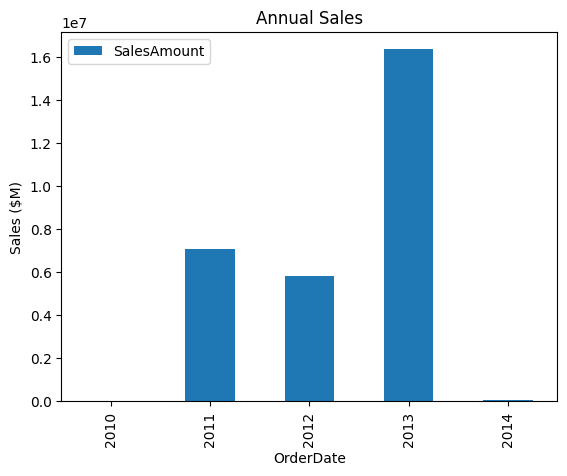

In [34]:
#Using Pandas to plot a bar graph of annual sales
ax=yearly_sales.plot.bar(y='SalesAmount') #One way. Orderdate is the index x and is the default.
#Adding labels
ax.set_ylabel('Sales ($M)')
ax.set_title('Annual Sales')
ax.legend()
ax.set_yscale('linear')

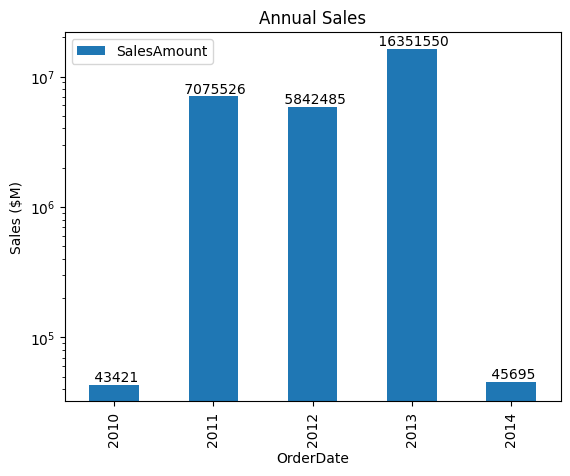

In [35]:
#Using Pandas to plot a bar graph of annual sales and changing the scale
ax=yearly_sales.plot(y='SalesAmount', kind='bar') #Another way. Orderdate is the index x and is the default.
#Adding labels
ax.set_ylabel('Sales ($M)')
ax.set_title('Annual Sales')
ax.legend()
ax.set_yscale('log') #Changing the scale allows for smaller values to be displayed.
for index, value in enumerate(yearly_sales['SalesAmount']):
    plt.text(index, value, f'{value: .0f}', ha='center', va='bottom')

In [36]:
ax.figure.savefig ('/content/drive/MyDrive/MSSP607/Assignments/Assignments/Assignment 2/AnnualSales1.pdf')

In [42]:
plt.close('all')

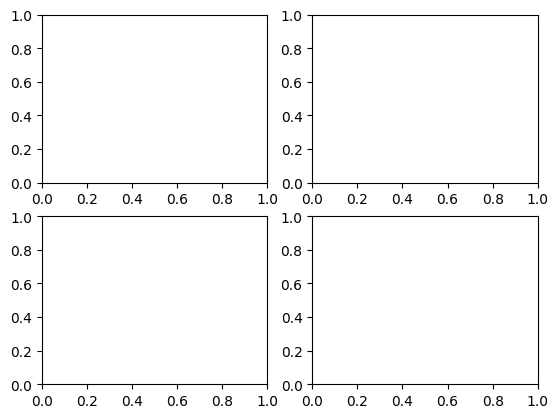

In [43]:
#Using Matplotlib, we need to create a figure to plot visualizations. We can create multiple axis(Artists) to plot
fig = plt.figure()
ax1 = fig.add_subplot(2,2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

In [44]:
plt.close('all')

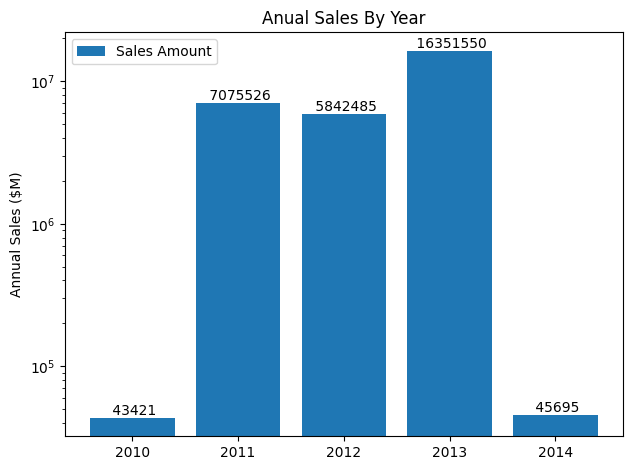

In [59]:
#Create and plot data using a figure and a single axis (artist) using Matplotib
years= ['2010','2011','2012','2013','2014']
fig, ax = plt.subplots()
ax.bar(years,"SalesAmount", data=yearly_sales,label='Sales Amount')
ax.set_ylabel('Annual Sales ($M)')
ax.set_title('Anual Sales By Year')
ax.legend()
fig.tight_layout()
ax.set_yscale('log')
for index, value in enumerate(yearly_sales['SalesAmount']):
    plt.text(index, value, f'{value: .0f}', ha='center', va='bottom')

In [60]:
#Print the visualization in a pdf form.  If we want a different file format (JPEG, PNG, etc.), we specify accordingly.

fig.savefig('/content/drive/MyDrive/MSSP607/Assignments/Assignments/Assignment 2/AnnualSales2.pdf')

In [ ]:
plt.close('all')

In [62]:
results


,CountryRegionCode,OrderQuantity,UnitPrice,SalesAmount,TotalProductCost,Profit
0,AU,13345,678.98,9061000.58,5375145.51,3685855.08
1,CA,7620,259.56,1977844.86,1147923.36,829921.50
2,DE,5625,514.54,2894312.34,1706941.57,1187370.76
3,FR,5558,475.71,2644017.71,1557752.99,1086264.72
4,GB,6906,491.13,3391712.21,2001221.43,1390490.78
5,US,21344,439.93,9389789.51,5488808.71,3900980.80
